In [1]:
# first import our datasets
from sklearn import datasets
digits = datasets.load_digits()
# our data
data = digits.data
# our lable
target = digits.target

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Different values for the number of clusters (k) and n_init
k_values = [10, 8, 12]
n_init_values = [10, 20, 30, 40, 50]

# Loop over different numbers of clusters
for k in k_values:
    for n_init in n_init_values:
        # Create a KMeans model with a specified number of clusters (k)
        kmeans_model = KMeans(n_clusters=k, n_init=n_init, random_state=42)
    
        # Fit the KMeans model to the data and obtain cluster labels for each data point (without using true labels)
        kmeans_labels = kmeans_model.fit_predict(data)
    
        # Evaluate the clustering quality using ARI (considering true labels)
        ari_score = adjusted_rand_score(digits.target, kmeans_labels)
    
        # Print the ARI for the current number of clusters (k) and n_init
        print(f'ARI for {k} clusters and {n_init} n_init: {ari_score:.4f}')


ARI for 10 clusters and 10 n_init: 0.6650
ARI for 10 clusters and 20 n_init: 0.6680
ARI for 10 clusters and 30 n_init: 0.6667
ARI for 10 clusters and 40 n_init: 0.6667
ARI for 10 clusters and 50 n_init: 0.6667
ARI for 8 clusters and 10 n_init: 0.5797
ARI for 8 clusters and 20 n_init: 0.5779
ARI for 8 clusters and 30 n_init: 0.5779
ARI for 8 clusters and 40 n_init: 0.5779
ARI for 8 clusters and 50 n_init: 0.5779
ARI for 12 clusters and 10 n_init: 0.7034
ARI for 12 clusters and 20 n_init: 0.7034
ARI for 12 clusters and 30 n_init: 0.7034
ARI for 12 clusters and 40 n_init: 0.7034
ARI for 12 clusters and 50 n_init: 0.7034


In [6]:
#!pip install fuzzy-c-means

In [8]:
from fcmeans import FCM

# For each desired number of clusters
for num_clusters in [10, 12, 8]:
    # Create an instance of the FCM algorithm
    fcm = FCM(n_clusters=num_clusters)
    
    # Apply the algorithm to the data
    fcm.fit(data)
    
    # Predict cluster labels
    fcm_labels = fcm.predict(data)
    
    # Calculate the Adjusted Rand Index (ARI) metric
    ari = adjusted_rand_score(target, fcm_labels)
    
    # Print the results
    print('ARI for {} clusters: {:.4f}'.format(num_clusters, ari))


ARI for 10 clusters: 0.1612
ARI for 12 clusters: 0.2010
ARI for 8 clusters: 0.2239


In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Different values for the number of clusters (n)
n_clusters = [10, 8, 12]

# Loop over different numbers of clusters
for n in n_clusters:
    # Create a Gaussian Mixture model with a specified number of clusters (n)
    em_model = GaussianMixture(n_components=n, covariance_type='full', random_state=42)

    # Fit the Gaussian Mixture model to the data and obtain cluster labels for each data point
    em_labels = em_model.fit_predict(data)

    # Evaluate the clustering quality using ARI (considering true labels)
    ari_score = adjusted_rand_score(digits.target, em_labels)

    # Print the ARI for the current number of clusters (n) using EM algorithm
    print(f'ARI for EM clustering with {n} clusters: {ari_score:.4f}')


ARI for EM clustering with 10 clusters: 0.6811
ARI for EM clustering with 8 clusters: 0.5504
ARI for EM clustering with 12 clusters: 0.6836


In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# List of cluster numbers to test
for k in [10, 12, 8]:
    
    # AgglomerativeClustering model with single link
    agg_single = AgglomerativeClustering(n_clusters=k, linkage='single')
    agg_single_labels = agg_single.fit_predict(data)
    
    # Calculate the ARI score
    acc_agg_single = adjusted_rand_score(target, agg_single_labels)
    
    # Print the results
    print('ARI(single link) for {} clusters: {:.4f}'.format(k, acc_agg_single))

    # AgglomerativeClustering model with complete link
    agg_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
    agg_complete_labels = agg_complete.fit_predict(data)
    
    # Calculate the ARI score
    acc_agg_complete = adjusted_rand_score(target, agg_complete_labels)
    
    # Print the results
    print('ARI(complete) for {} clusters: {:.4f}'.format(k, acc_agg_complete))

    # AgglomerativeClustering model with average link
    agg_average = AgglomerativeClustering(n_clusters=k, linkage='average')
    agg_average_labels = agg_average.fit_predict(data)
    
    # Calculate the ARI score
    acc_agg_average = adjusted_rand_score(target, agg_average_labels)
    
    # Print the results
    print('ARI(average) for {} clusters: {:.4f}'.format(k, acc_agg_average))


ARI(single link) for 10 clusters: 0.0000
ARI(complete) for 10 clusters: 0.4287
ARI(average) for 10 clusters: 0.5142
ARI(single link) for 12 clusters: 0.0000
ARI(complete) for 12 clusters: 0.4786
ARI(average) for 12 clusters: 0.5804
ARI(single link) for 8 clusters: 0.0000
ARI(complete) for 8 clusters: 0.3867
ARI(average) for 8 clusters: 0.3713


## qustion 2

In [7]:
import numpy as np
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv(r'E:\tmu . machine\EX\تمرین 2\cargo+2000+freight+tracking+and+tracing (1)\c2k_data_comma.csv')

# Check for missing values and display the count for each column
df.isna().sum()

# Replace '?' with NaN and drop a specific row with missing values
df = df.replace('?', np.NaN)
df.drop(3942, inplace=True)


# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# Fill missing values with the mean of each column
for col in df.columns:
    df[col] = df[col].replace(np.NaN, df[col].mean())

# Check for missing values after filling
df.isnull().sum()


# Convert the 'legs' column to the integer data type
df['legs'] = df['legs'].astype(int)

# Separate features (x) and target variable (y)
x = df.drop('legs', axis=1)
y = df['legs']

# Drop the 'nr' column from the features
df.drop('nr', axis=1, inplace=True)

# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc = scaler.fit_transform(x)
x_scaled = pd.DataFrame(sc, columns=x.columns, index=x.index)

# Display the standardized features
x_scaled.head()


,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_rcf_2_place,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops
0,-1.732003,-0.499935,-0.428069,-0.315229,0.029288,-0.725000,0.452405,0.315949,0.091148,-0.887648,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,-1.610516,-0.226382,-0.926303
1,-1.731125,-0.184074,-0.290329,-0.234847,-0.826233,-0.605240,0.843388,2.589008,0.979835,-0.150321,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,0.171105,-0.225619,-0.926303
2,-1.730246,-0.335998,0.464785,0.541517,-0.826233,-0.630068,-0.204961,0.247757,-0.156218,0.983056,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,-1.743128,-0.151073,-0.926303
3,-1.729367,-1.420197,-0.308480,-0.325990,0.243168,0.095795,-1.420873,-1.036521,-0.116954,-0.495812,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,0.119213,-0.245452,-0.926303
4,-1.728489,0.191379,-0.129525,-0.036968,-0.398473,-0.687027,-0.398303,-0.479622,-0.071145,-1.426950,...,-3.359928e-01,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,0.326780,0.076171,1.025320


In [8]:
# Assume x_train, x_test, y_train, and y_test are your training and testing data
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Loop over different values for the number of neighbors (k)
for k in [1, 3, 5, 7, 11, 13, 17]:
    # Create a K-Nearest Neighbors model with a specified number of neighbors (k)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model on the training data
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    knn_pred = knn_model.predict(X_test)
    
    # Evaluate the accuracy of the model using accuracy_score
    accuracy = accuracy_score(y_test, knn_pred)
    
    # Print the accuracy for the current number of neighbors (k)
    print(f'Accuracy for {k} neighbors: {accuracy:.4f}')


Accuracy for 1 neighbors: 0.7396
Accuracy for 3 neighbors: 0.7287
Accuracy for 5 neighbors: 0.7219
Accuracy for 7 neighbors: 0.7101
Accuracy for 11 neighbors: 0.6779
Accuracy for 13 neighbors: 0.6720
Accuracy for 17 neighbors: 0.6526


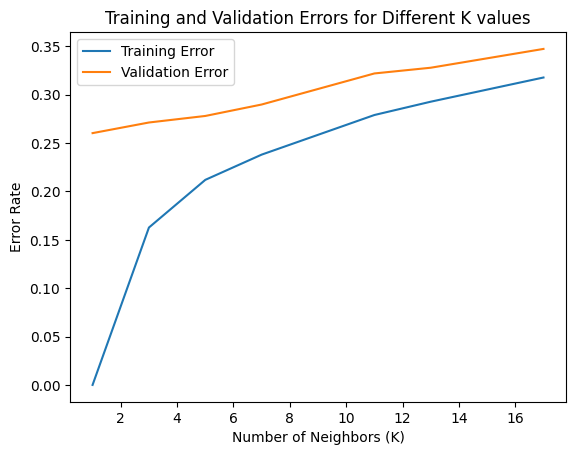

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Lists to store training and validation errors for different values of K
train_errors = []
validation_errors = []

# Loop over different values for the number of neighbors (K)
k_values = [1, 3, 5, 7, 11, 13, 17]
for k in k_values:
    # Create a K-Nearest Neighbors model with a specified number of neighbors (K)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model on the training data
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the training data
    train_pred = knn_model.predict(X_train)
    
    # Make predictions on the validation data
    validation_pred = knn_model.predict(X_test)
    
    # Calculate training and validation errors
    train_error = 1 - accuracy_score(y_train, train_pred)
    validation_error = 1 - accuracy_score(y_test, validation_pred)
    
    # Append errors to the lists
    train_errors.append(train_error)
    validation_errors.append(validation_error)

# Plotting the training and validation errors
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, validation_errors, label='Validation Error')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Training and Validation Errors for Different K values')
plt.legend()
plt.show()


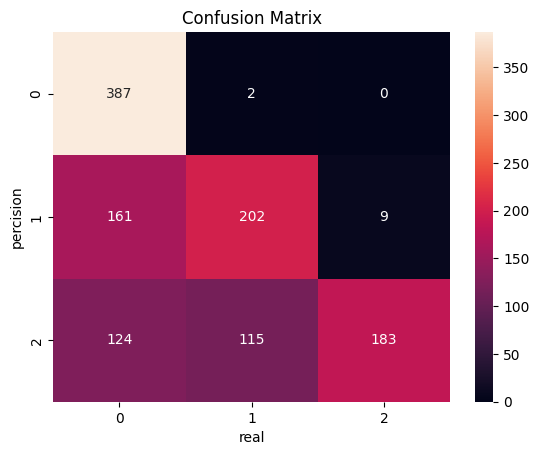

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

KNN_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(KNN_cm, 
            annot=True,
            fmt='g')
plt.ylabel('percision')
plt.xlabel('real')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

# Create a K-Nearest Neighbors model with the optimal K
best_k = k_values[validation_errors.index(min(validation_errors))]
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred_best_k = best_knn_model.predict(X_test)

# Calculate evaluation metrics for the initial model
classification_report_initial = classification_report(y_test, knn_pred)
precision_initial = precision_score(y_test, knn_pred, average='macro')
recall_initial = recall_score(y_test, knn_pred, average='macro')
f1_score_initial = f1_score(y_test, knn_pred, average='macro')

# Calculate evaluation metrics for the model with the best K
classification_report_best_k = classification_report(y_test, y_pred_best_k)
precision_best_k = precision_score(y_test, y_pred_best_k, average='macro')
recall_best_k = recall_score(y_test, y_pred_best_k, average='macro')
f1_score_best_k = f1_score(y_test, y_pred_best_k, average='macro')

# Print the results
print("Classification Report for Initial Model:\n", classification_report_initial)
print("Precision for Initial Model:", precision_initial)
print("Recall for Initial Model:", recall_initial)
print("F-measure for Initial Model:", f1_score_initial)

print("\nClassification Report for Best K Model:\n", classification_report_best_k)
print("Precision for Best K Model:", precision_best_k)
print("Recall for Best K Model:", recall_best_k)
print("F-measure for Best K Model:", f1_score_best_k)


Classification Report for Initial Model:
               precision    recall  f1-score   support

           1       0.58      0.99      0.73       389
           2       0.63      0.54      0.58       372
           3       0.95      0.43      0.60       422

    accuracy                           0.65      1183
   macro avg       0.72      0.66      0.64      1183
weighted avg       0.73      0.65      0.64      1183

Precision for Initial Model: 0.7207488990894163
Recall for Initial Model: 0.6571728845376302
F-measure for Initial Model: 0.6367505298781935

Classification Report for Best K Model:
               precision    recall  f1-score   support

           1       0.70      0.95      0.81       389
           2       0.68      0.65      0.66       372
           3       0.89      0.63      0.74       422

    accuracy                           0.74      1183
   macro avg       0.75      0.74      0.73      1183
weighted avg       0.76      0.74      0.73      1183

Precision for